### [2014 vs 2024 자동차리콜 데이터 분석]

In [1]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

## 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
## 데이터준비
DATA_FILE24 = './2024_All_recol.csv'
DF24 = pd.read_csv(DATA_FILE24)

DATA_FILE14 = './2014_All_recol.csv'
DF14 = pd.read_csv(DATA_FILE14)

DF24.head()

,date,kind,content,solution
0,주행장치 기타,2024-12-27 ~,"휠 중앙 잠금장치가 제조상 문제로 내구성이 부족하여 파손될 수 있으며, 이런 경우 ...",휠 중앙 잠금장치 점검 후 필요 시 정상품으로 교체
1,주행장치 기타,2024-12-27 ~,"휠 중앙 잠금장치가 제조상 문제로 내구성이 부족하여 파손될 수 있으며, 이런 경우 ...",휠 중앙 잠금장치 점검 후 필요 시 정상품으로 교체
2,조향장치 기타,2024-12-26 ~,스티어링 기어박스와 브라켓을 연결하는 볼트 체결 작업불량으로 체결력이 저하될 수 있...,볼트 재체결
3,전기장치 기타,2024-12-24 ~,주간상시점등장치(DRL) 제어기 로직이 오설정(벌브사양 방향지시등)되어 벌브사양 방...,파워 도메인 컨트롤러(PDC) 소프트웨어 업데이트
4,연료장치 기타,2024-12-23 ~,연료 펌프 컨트롤 모듈이 과도한 습기에 노출될 경우 일부 IC칩(집적회로)이 손상될...,"연료 펌프 컨트롤 모듈 교환 <대상차량별 시정조치기간>XT5, XT6: 2024년 ..."


In [3]:
DF24.dropna(inplace=True)

DF24.columns = ["kind", "date", "content", "solution"]

DF24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 422
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kind      420 non-null    object
 1   date      420 non-null    object
 2   content   420 non-null    object
 3   solution  420 non-null    object
dtypes: object(4)
memory usage: 16.4+ KB


In [4]:
DF14.info()

DF14.columns = ["kind", "date", "content", "solution"]

DF14.loc[DF14.solution.isna()].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      174 non-null    object
 1   kind      174 non-null    object
 2   content   174 non-null    object
 3   solution  140 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


,kind,date,content,solution
0,전기장치,2014-12-31 ~,프로그램 오류로 전방 턴시그널이 정상 작동하지 않을 수 있는 가능성 발견,NaN
4,원동기(엔진),2014-12-26 ~,연료소비율 안전기준(제111조의4) 부적합,NaN
9,쇽업소버 장치,2014-12-15 ~,조립과정에서 쇽업소버 상단 부분의 유격으로 인하여 충격흡수가 안 될 수 있는 가능성 발견,NaN
17,시계확보장치 기타,2014-11-28 ~,공차가 벗어난 선루프 스틸 금속 프레임의 원인으로 강화 유리 텐션을 감소 시켜 주변...,NaN
18,트레일링 암,2014-11-28 ~,리어토션 크랭크 액슬의 트레일링 암에 대한 초기 변형은 차량에 대한 후방 충격 또는...,NaN


[1] 업데이트로 해결가능한 리콜 데이터

In [14]:
## 2024년 전체결함 : 240건 중 소프트웨어 업데이트로 해결가능한 리콜 건수 119건
DF24_SW = DF24[ DF24['solution'].str.contains("업데이트", na=False)]
len(DF24_SW)
240-119

121

In [11]:
## 2014년 전체결함 : 174건 중 소프트웨어 업데이트로 해결가능한 리콜 건수 10건
DF14_SW = DF14[ DF14['solution'].str.contains("업데이트", na=False)]
len(DF14_SW)
(len(DF14)-len(DF14_SW))

164

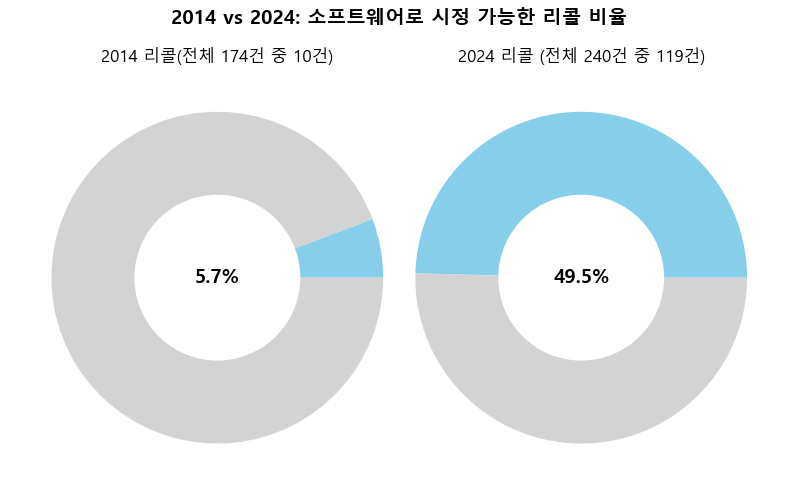

In [15]:
# 데이터 정의
data_2024 = [119, 121]
data_2014 = [10, 164]

labels = ['SW 시정', 'HW 시정']

colors = ['skyblue', 'lightgray']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 2014 차트
axes[0].pie(data_2014, colors=colors, wedgeprops={'width':0.5})
axes[0].set_title("2014 리콜(전체 174건 중 10건)", fontsize=12)
axes[0].text(0, 0, "5.7%", ha='center', va='center', fontsize=14, fontweight='bold')

# 2024 차트
axes[1].pie(data_2024, colors=colors, wedgeprops={'width':0.5})
axes[1].set_title("2024 리콜 (전체 240건 중 119건)", fontsize=12)
axes[1].text(0, 0, "49.5%", ha='center', va='center', fontsize=14, fontweight='bold')

# 전체 제목
plt.suptitle("2014 vs 2024: 소프트웨어로 시정 가능한 리콜 비율", fontsize=14, fontweight='bold')

plt.subplots_adjust(top=0.3)
plt.tight_layout()
plt.show()


[2] 업데이트로 해결가능한 리콜데이터 결함 종류

In [8]:
display(DF24.kind.value_counts())
display(DF24_SW.kind.value_counts())

kind
원동기(동력발생장치) 기타    81
전기장치 기타           48
제동장치 기타           46
연료장치 기타           38
승차 및 실내장치 기타      32
동력전달장치 기타         30
기타장치 기타           26
차체/차대 기타          26
조향장치 기타           21
실내안전장치 기타         20
등화장치 기타           19
주행장치 기타           11
완충장치 기타            7
시계확보장치 기타          7
창유리 기타             4
냉/난방 장치 기타         2
차체(바디)             1
전조등                1
Name: count, dtype: int64

kind
원동기(동력발생장치) 기타    34
제동장치 기타           13
전기장치 기타           13
등화장치 기타           10
동력전달장치 기타         10
승차 및 실내장치 기타       9
기타장치 기타            7
조향장치 기타            7
차체/차대 기타           4
연료장치 기타            4
실내안전장치 기타          4
창유리 기타             1
주행장치 기타            1
냉/난방 장치 기타         1
시계확보장치 기타          1
Name: count, dtype: int64

In [9]:
display(DF14.kind.value_counts())
display(DF14_SW.kind.value_counts())

kind
원동기(엔진)           21
승차 및 실내장치         21
동력전달장치            15
제동장치              15
조향장치              10
등화장치              10
연료장치               9
차대(프레임)/차체         9
전기장치               7
주행장치               6
기타장치               5
완충장치               5
각종 조작 스위치          5
엔진 본체 기계적 구성장치     4
엔진제어장치(ECU)        3
연료파이프              2
시계확보장치             2
차축 장치              2
트레일링 암             2
쇽업소버 장치            1
클러치장치              1
엔진 마운팅 장치          1
시계확보장치 기타          1
방향지시등              1
자동변속기              1
계기판                1
배터리                1
와이퍼 관련장치           1
연료탱크               1
도어                 1
선반/콘솔박스/음향기기       1
제동장치 기타            1
흡입·과급장치            1
배출가스 저감장치          1
로어/어퍼암             1
배기장치               1
동력발생장치(전기자동차)      1
좌석 장치              1
연료펌프 및 휠타          1
디스크식 제동장치          1
Name: count, dtype: int64

kind
승차 및 실내장치        2
조향장치             2
동력전달장치           2
등화장치             1
주행장치             1
엔진제어장치(ECU)      1
동력발생장치(전기자동차)    1
Name: count, dtype: int64

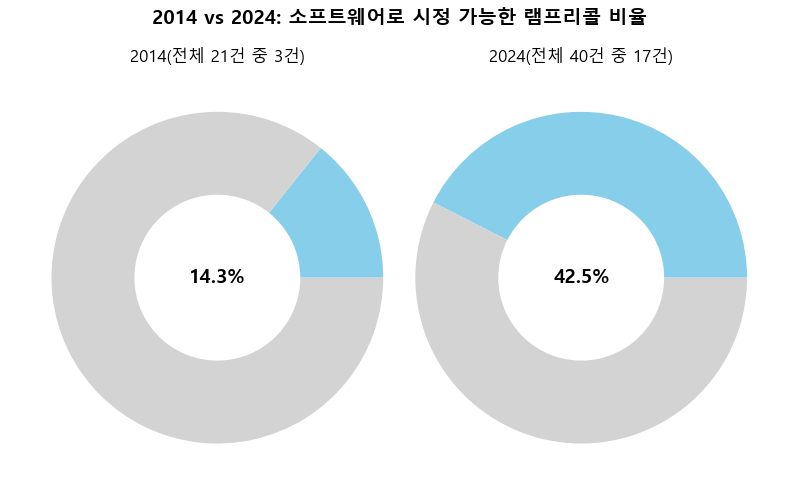

In [16]:
# 데이터 정의
data_2014 = [3, 18]
data_2024 = [17, 23]

labels = ['SW 시정', 'HW 시정']

colors = ['skyblue', 'lightgray']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 2014 차트
axes[0].pie(data_2014, colors=colors, wedgeprops={'width':0.5})
axes[0].set_title("2014(전체 21건 중 3건)", fontsize=12)
axes[0].text(0, 0, "14.3%", ha='center', va='center', fontsize=14, fontweight='bold')

# 2024 차트
axes[1].pie(data_2024, colors=colors, wedgeprops={'width':0.5})
axes[1].set_title("2024(전체 40건 중 17건)", fontsize=12)
axes[1].text(0, 0, "42.5%", ha='center', va='center', fontsize=14, fontweight='bold')

# 전체 제목
plt.suptitle("2014 vs 2024: 소프트웨어로 시정 가능한 램프리콜 비율", fontsize=14, fontweight='bold')

plt.subplots_adjust(top=0.3)
plt.tight_layout()
plt.show()
